# A6b

## Name : Aakash Kathirvel

## VID : V01110153

## Date : 25/07/2024

In [20]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

In [21]:
# Download the data for Google
ticker = "GOOG"
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [22]:
# Calculate daily returns and drop NaN values
data['Returns'] = 100 * data['Adj Close'].pct_change().dropna()
data = data.dropna(subset=['Returns'])

In [23]:
# Fit an ARCH model
arch_model_fit = arch_model(data['Returns'], vol='ARCH', p=1).fit(disp='off')
print(arch_model_fit.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1576.40
Distribution:                  Normal   AIC:                           3158.79
Method:            Maximum Likelihood   BIC:                           3172.66
                                        No. Observations:                  752
Date:                Thu, Jul 25 2024   Df Residuals:                      751
Time:                        16:46:19   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0835  7.369e-02      1.134      0.257 [-6.08

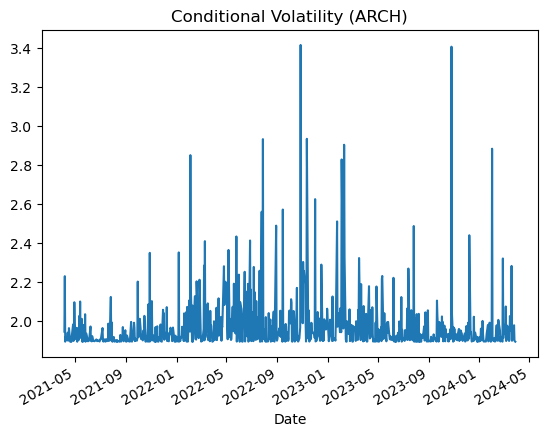

In [24]:
# Plot the conditional volatility
arch_model_fit.conditional_volatility.plot(title='Conditional Volatility (ARCH)')
plt.show()

In [25]:
# Fit a GARCH model
garch_model_fit = arch_model(data['Returns'], vol='Garch', p=1, q=1).fit(disp='off')
print(garch_model_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1551.87
Distribution:                  Normal   AIC:                           3111.75
Method:            Maximum Likelihood   BIC:                           3130.24
                                        No. Observations:                  752
Date:                Thu, Jul 25 2024   Df Residuals:                      751
Time:                        16:47:25   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1056  6.826e-02      1.547      0.122 [-2.82

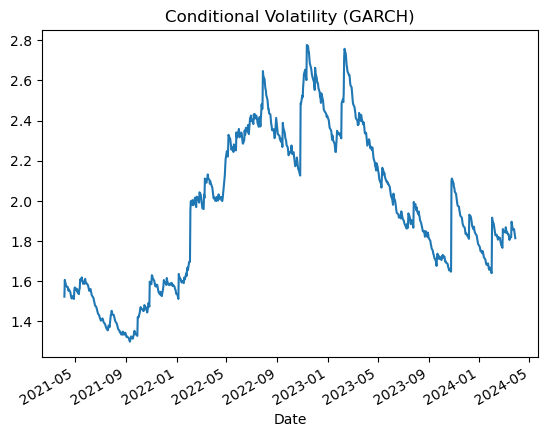

In [26]:
# Plot the conditional volatility
garch_model_fit.conditional_volatility.plot(title='Conditional Volatility (GARCH)')
plt.show()

In [27]:
# Fit another GARCH model with different parameters
am = arch_model(data['Returns'], vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     36,   Neg. LLF: 1801.0530353095264
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1641.2884585700526
Iteration:     15,   Func. Count:    101,   Neg. LLF: 1560.9386405607097
Iteration:     20,   Func. Count:    130,   Neg. LLF: 1551.8746534123648
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1551.8746524048136
            Iterations: 24
            Function evaluations: 139
            Gradient evaluations: 22


In [28]:
# Forecast the next 90 days
forecasts = res.forecast(horizon=90)

In [29]:
# Display the last 3 rows of forecasted values
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2024-03-28  0.105563  0.105563  0.105563  0.105563  0.105563  0.105563   

                h.07      h.08      h.09      h.10  ...      h.81      h.82  \
Date                                                ...                       
2024-03-28  0.105563  0.105563  0.105563  0.105563  ...  0.105563  0.105563   

                h.83      h.84      h.85      h.86      h.87      h.88  \
Date                                                                     
2024-03-28  0.105563  0.105563  0.105563  0.105563  0.105563  0.105563   

                h.89      h.90  
Date                            
2024-03-28  0.105563  0.105563  

[1 rows x 90 columns]
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2024-03-28  3.236055  3.241567  3.247055  3.25

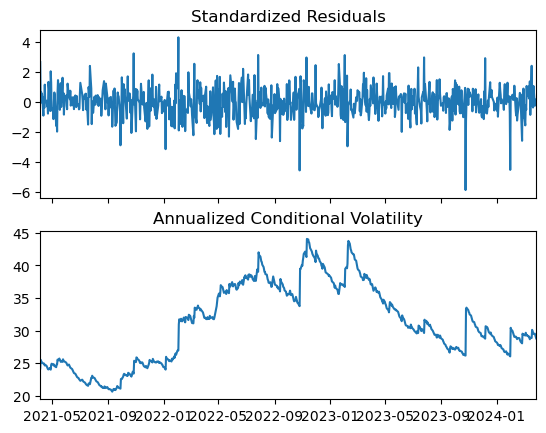

In [31]:
# Plot the annualized conditional volatility
fig = res.plot(annualize="D")
plt.show()